In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import folium
import os

In [2]:
#load earning data csv
full_data = pd.read_csv("Docs/Earnings Data.csv")

full_data.head()
print(f"Number of records: {len(full_data)}")

Number of records: 6806


In [3]:
#filter to keep only:
#online only schools, schools with greater than 100 students, 4yr schools
clean_data = full_data.loc[(full_data["Online only?"] == 0) &
                       (full_data["School size (students)"] > 100) &
                       (full_data["2yr/4yr"]) == 1 &
                        (full_data["Earnings after 10 years - mean"] > 0) ]

#drop rows with empty values
clean_data.dropna

#display dataframe and number of records
print(f"Number of records: {len(clean_data)}")
clean_data.head()

Number of records: 4377


,School,State,Online only?,School size (students),2yr/4yr,Pubic or Private,Tuition (in state),Tuition (out of state),Earnings after 10 years - mean,Earnings after 10 years - median,Earnings after 10 years - std,Earnings after 10 years - mean - female,Earnings after 10 years - mean - male,Earnings after 6 years - mean,Earnings after 6 years - median,Earnings after 6 years - std,Earnings after 6 years - mean - female,Earnings after 6 years - mean - male
0,Millikin University,IL,0.0,1918.0,1,2,35002.0,35002.0,48900.0,42200.0,42500.0,42800.0,56700.0,35900.0,33000.0,23400.0,34200.0,38300.0
1,Monmouth College,IL,0.0,901.0,1,2,37674.0,37674.0,45800.0,42900.0,26000.0,41600.0,51400.0,32800.0,31300.0,19200.0,28700.0,36900.0
2,Illinois College,IL,0.0,971.0,1,2,33090.0,33090.0,44300.0,41000.0,26800.0,41400.0,48600.0,32600.0,31400.0,18000.0,29700.0,35500.0
3,Quincy University,IL,0.0,916.0,1,2,28562.0,28562.0,44400.0,38900.0,45900.0,35600.0,53700.0,33100.0,31100.0,17500.0,31900.0,34900.0
7,Lincoln Christian University,IL,0.0,398.0,1,2,13200.0,13200.0,30000.0,27000.0,22400.0,23200.0,36000.0,29800.0,25600.0,19400.0,26300.0,33000.0


# 10-year Earnings Analysis

In [4]:
#create a dataframe with only the relevant columns
ten_data = clean_data[["School","State","Earnings after 10 years - mean","Earnings after 10 years - median",
                       "Earnings after 10 years - mean - female","Earnings after 10 years - mean - male",
                      "Pubic or Private","Tuition (in state)","Tuition (out of state)"]]

#create dataframe with null values removed
clean_10_data = ten_data.dropna(axis=0, how='any')

#display number of records
print(f"Number of records: {len(clean_10_data)}")

Number of records: 1705


In [5]:
#display dataframe stats
clean_10_data.describe()

,Earnings after 10 years - mean,Earnings after 10 years - median,Earnings after 10 years - mean - female,Earnings after 10 years - mean - male,Pubic or Private,Tuition (in state),Tuition (out of state)
count,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,47143.167155,42358.709677,41976.832845,53683.284457,1.651613,21705.216422,25859.018182
std,13473.417641,11007.892846,11768.606657,15335.559907,0.584953,15063.044036,12875.220161
min,18300.000000,15700.000000,16500.000000,16100.000000,1.000000,480.000000,480.000000
25%,38800.000000,35500.000000,34100.000000,44300.000000,1.000000,8556.000000,16200.000000
50%,45300.000000,41500.000000,40400.000000,51700.000000,2.000000,16940.000000,24184.000000
75%,53600.000000,47700.000000,47900.000000,60300.000000,2.000000,32766.000000,34114.000000
max,148400.000000,125800.000000,109400.000000,160800.000000,3.000000,59430.000000,59430.000000


In [6]:
#create dataframe showing the schools with the 10 top future earnings
top_10_earnings = clean_10_data[["School","State",
                                 "Tuition (out of state)",
                                 "Earnings after 10 years - median"]].sort_values("Earnings after 10 years - median",ascending=False).head(10)
#display frame
top_10_earnings

,School,State,Tuition (out of state),Earnings after 10 years - median
4317,Albany College of Pharmacy and Health Sciences,NY,35105.0,125800.0
3684,St. Louis College of Pharmacy,MO,29981.0,119900.0
4490,MCPHS University,MA,33620.0,109300.0
1950,University of the Sciences,PA,25000.0,100700.0
4491,Massachusetts Institute of Technology,MA,51832.0,93000.0
769,Harvard University,MA,50420.0,87000.0
2257,University of Colorado Denver/Anschutz Medical...,CO,25771.0,85200.0
4484,Babson College,MA,51104.0,82100.0
1867,Stevens Institute of Technology,NJ,52202.0,82100.0
1852,Princeton University,NJ,50340.0,80900.0


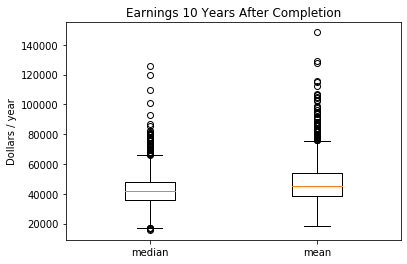

In [7]:
#create boxplots of median and mean future earnings
fig, ax1 = plt.subplots()
data = [clean_10_data["Earnings after 10 years - median"],clean_10_data["Earnings after 10 years - mean"]]
labels = ["median","mean"]
ax1.boxplot(data,labels=labels,widths=.3)
ax1.set_title("Earnings 10 Years After Completion")
ax1.set_ylabel("Dollars / year")
plt.show()

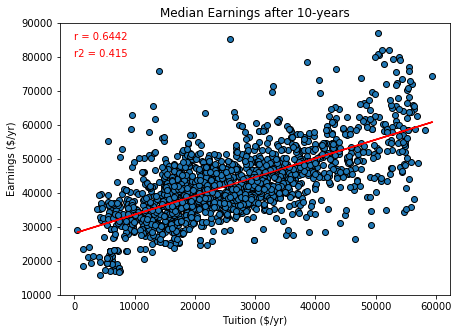

In [8]:
#create plot showing the relationship between tuition cost and future earnings

#define x and y values
x_values = clean_10_data["Tuition (out of state)"]
y_values = clean_10_data["Earnings after 10 years - median"]

#create figure
fig1 = plt.figure(figsize=(7,5))

#plot data
plt.scatter(x_values, y_values, edgecolors="black")

#find regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#plt regression line
plt.plot(x_values,regress_values,c="r")

#add r and r2 values to the plot
plt.annotate(f"r2 = {round(rvalue**2,4)}",(0,80000),c="r")
plt.annotate(f"r = {round(rvalue,4)}",(0,85000),c="r")

#set title, labels and limits
plt.title("Median Earnings after 10-years")
plt.xlabel("Tuition ($/yr)")
plt.ylabel("Earnings ($/yr)")
plt.ylim((10000,90000))

#save figure as png file
plt.savefig("Figures/Fig 1 - Median Earnings after 10-years")

#show plot
plt.show()

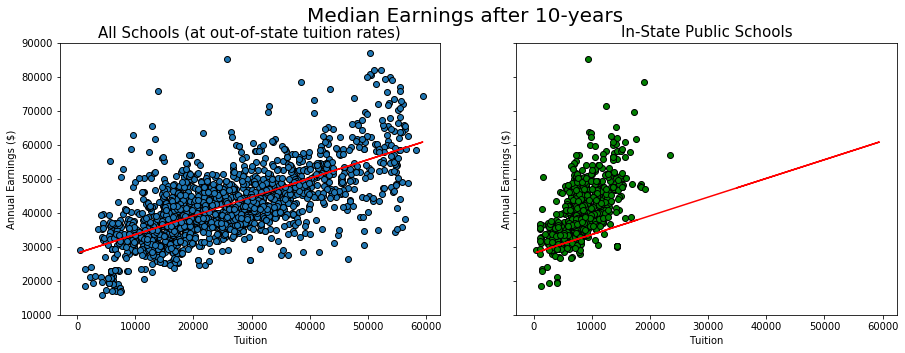

Number of in-state schools plotted: 692


In [9]:
#plot the relationship between in-state school tuition and future earnings along side the above plot

#create subplots
fig2, (ax1, ax2) = plt.subplots(1,2,sharey=True,sharex=True,figsize=(15,5))

#add title to the pair of plots
fig2.suptitle("Median Earnings after 10-years",size=20)

#create same plot as above
ax1.scatter(x_values,y_values,edgecolors="black")
ax1.plot(x_values,regress_values,c="r")
#set title, labels and limits
ax1.set_title("All Schools (at out-of-state tuition rates)",size=15)
ax1.set_xlabel("Tuition")
ax1.set_ylabel("Annual Earnings ($)")
ax1.set_ylim((10000,90000))

#add plot for in-state schools
#define x and y values
ax2_x_values = clean_10_data["Tuition (in state)"].loc[clean_10_data["Pubic or Private"] == 1]
ax2_y_values = clean_10_data["Earnings after 10 years - median"].loc[clean_10_data["Pubic or Private"] == 1]
#define regression values
ax2_regress_values = ax2_x_values * slope + intercept
#plot scatterplot
ax2.scatter(ax2_x_values,ax2_y_values,edgecolors="black",c="g")
#plot regression line from previous plot (to show the difference)
ax2.plot(x_values,regress_values,c="r")
#set title, labels and limits
ax2.set_title("In-State Public Schools",size=15)
ax2.set_xlabel("Tuition")
ax2.set_ylabel("Annual Earnings ($)")
ax2.set_ylim((10000,90000))

#save figure to png
plt.savefig("Figures/Fig 2 - In vs Out of State Comparison")
plt.show()

#display number of in-state schools plotted
print(f"Number of in-state schools plotted: {len(ax2_x_values)}")

In [10]:
#add columns to show future earning as a multiple of tuition cost
clean_10_data["Earnings (x in state tuition)"] = (clean_10_data.loc[:,"Earnings after 10 years - median"].copy()) / (clean_10_data.loc[:,"Tuition (in state)"].copy())
clean_10_data["Earnings (x out of state tuition)"] = (clean_10_data.loc[:,"Earnings after 10 years - median"].copy()) / (clean_10_data.loc[:,"Tuition (out of state)"].copy())

#display dataframe
clean_10_data.head()

C:\Users\mcgra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mcgra\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,School,State,Earnings after 10 years - mean,Earnings after 10 years - median,Earnings after 10 years - mean - female,Earnings after 10 years - mean - male,Pubic or Private,Tuition (in state),Tuition (out of state),Earnings (x in state tuition),Earnings (x out of state tuition)
0,Millikin University,IL,48900.0,42200.0,42800.0,56700.0,2,35002.0,35002.0,1.205645,1.205645
1,Monmouth College,IL,45800.0,42900.0,41600.0,51400.0,2,37674.0,37674.0,1.138716,1.138716
2,Illinois College,IL,44300.0,41000.0,41400.0,48600.0,2,33090.0,33090.0,1.239045,1.239045
3,Quincy University,IL,44400.0,38900.0,35600.0,53700.0,2,28562.0,28562.0,1.361949,1.361949
7,Lincoln Christian University,IL,30000.0,27000.0,23200.0,36000.0,2,13200.0,13200.0,2.045455,2.045455


In [11]:
#group date by state to be used for map figure

#group data by state
st_grp = clean_10_data.groupby("State")
#create dataframe from grouping mean values
state_means = pd.DataFrame(st_grp.mean())
#reset index so we can use the 'state' column
state_means = state_means.reset_index()

#create a dataframe with only relevant columns
instate_summary = state_means[["State",
                               "Tuition (in state)",
                               "Earnings after 10 years - median"]]
    

#create new column to show earnings as a multiple of tuition at the state level
instate_summary["Earnings (x in state tuition)"] = instate_summary["Earnings after 10 years - median"] / instate_summary["Tuition (in state)"]


#format and sort
instate_summary = instate_summary.round({"Tuition (in state)":0,
                       "Earnings after 10 years - median":0,
                      "Earnings (x in state tuition)":2}).sort_values("Earnings (x in state tuition)",ascending=False)

#display results and save to csv
instate_summary
instate_summary.to_csv("Docs/In State School Summary.csv")

C:\Users\mcgra\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
#create a chloropleth map that show which state have the best bang-for-the-buck in-state schools

#removed WY, VI and other from the list so the the rest of the map has more color variation
instate_summary_map = instate_summary[(instate_summary["State"]!="WY") &
                                   (instate_summary["State"]!="VI") &
                                  (instate_summary["State"]!="GU") &
                                     (instate_summary["State"]!="MP") &
                                     (instate_summary["State"]!="PR")]

# Load the shape of the zone (US states)
# Found the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
state_geo = os.path.join("Docs/us_map.json")
 
# Initialize the map:
# define coordinate of map center, and set starting zoom level
m = folium.Map(location=[37, -99], zoom_start=4)
 
# Create the chloropleth:
m.choropleth(
 #set map zones
 geo_data=state_geo,
 #name the layer
 name='chloropleth',
 #bring in the dataframe that has the data
 data=instate_summary_map,
 #define which columns have the data
 columns=["State", "Earnings (x in state tuition)"],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Future Earnings per year (x yearly tuition)'
)
folium.LayerControl().add_to(m)

#save image to html file
m.save("Figures/In-State Earnings Map.html")

C:\Users\mcgra\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [13]:
print("DONE")

DONE
